In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/COVID_19_Datasets/master/csse_covid_19_daily_reports_us.csv")

In [3]:
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [4]:
df.tail()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
53,Virginia,US,2020-05-21 02:32:54,37.7693,-78.1700,32908,1075,4523.0,27310.0,51,385.541875,212626.0,6059.0,3.266683,84000051,USA,2491.072892,18.411936
54,Washington,US,2020-05-21 02:32:54,47.4009,-121.4905,18971,1037,NaN,17934.0,53,249.130224,293120.0,NaN,5.466238,84000053,USA,3849.298999,NaN
55,West Virginia,US,2020-05-21 02:32:54,38.4912,-80.9545,1567,69,950.0,548.0,54,87.437024,80641.0,NaN,4.403318,84000054,USA,4499.686689,NaN
56,Wisconsin,US,2020-05-21 02:32:54,44.2685,-89.6165,13413,481,7728.0,5204.0,55,230.367575,167713.0,2161.0,3.586073,84000055,USA,2880.462020,16.111235
57,Wyoming,US,2020-05-21 02:32:54,42.7560,-107.3025,787,11,528.0,248.0,56,135.980607,18840.0,74.0,1.397713,84000056,USA,3255.240955,9.402795


Field description
 - Province_State - The name of the State within the USA.
 - Country_Region - The name of the Country (US).
 - Last_Update - The most recent date the file was pushed.
 - Lat - Latitude.
 - Long_ - Longitude.
 - Confirmed - Aggregated confirmed case count for the state.
 - Deaths - Aggregated Death case count for the state.
 - Recovered - Aggregated Recovered case count for the state.
 - Active - Aggregated confirmed cases that have not been resolved (Active = Confirmed - Recovered - Deaths).
 - FIPS - Federal Information Processing Standards code that uniquely identifies counties within the USA.
 - Incident_Rate - confirmed cases per 100,000 persons.
 - People_Tested - Total number of people who have been tested.
 - People_Hospitalized - Total number of people hospitalized.
 - Mortality_Rate - Number recorded deaths * 100/ Number confirmed cases.
 - UID - Unique Identifier for each row entry.
 - ISO3 - Officialy assigned country code identifiers.
 - Testing_Rate - Total number of people tested per 100,000 persons.
 - Hospitalization_Rate - Total number of people hospitalized * 100/ Number of confirmed cases.

In [5]:
for col in df.columns.values:
    print("Number of unique values {} : {}".format(col,df[col].nunique()))

Number of unique values Province_State : 58
Number of unique values Country_Region : 1
Number of unique values Last_Update : 1
Number of unique values Lat : 56
Number of unique values Long_ : 56
Number of unique values Confirmed : 58
Number of unique values Deaths : 56
Number of unique values Recovered : 42
Number of unique values Active : 58
Number of unique values FIPS : 58
Number of unique values Incident_Rate : 56
Number of unique values People_Tested : 56
Number of unique values People_Hospitalized : 33
Number of unique values Mortality_Rate : 57
Number of unique values UID : 58
Number of unique values ISO3 : 6
Number of unique values Testing_Rate : 56
Number of unique values Hospitalization_Rate : 33


In [6]:
df.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

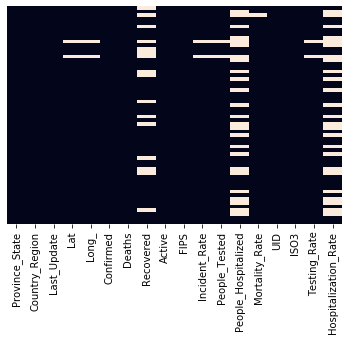

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

 - We can see that we have some missing value in columns like long_, lat_ etc. and we need to handle these missing value for further analysis.

 - As the Latitude and Longitude can vary between -180 to 180 degrees I am replacing the NaN values with the mean of the column.

In [8]:
df['Long_'] = df['Long_'].fillna(df['Long_'].mean())

In [9]:
df['Lat'] = df['Lat'].fillna(df['Lat'].mean())

 - Recovered

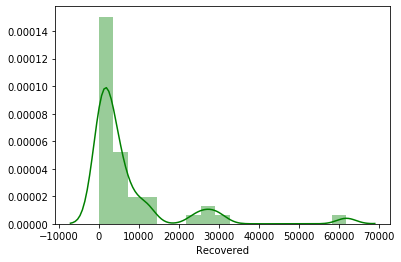

In [10]:
sns.distplot(df['Recovered'],color='green')

 - As the column Recovered is positively skewed, replacing the null values with mean wont be a good choice
 - Also there are some places where the confirmed cases are 0 and if we make recovered cases more then confirmed cases it wont make any sense.
 - So lets replace the null values  in Recovered column with (Confirmed-Active-Deaths)

In [11]:
df['Recovered'] = df['Recovered'].replace(np.nan,df['Confirmed']-(df['Active']+df['Deaths']))

 - People_Hospitalized
 - We can replace this column with the median of the column

In [12]:
df['People_Hospitalized'] = df['People_Hospitalized'].replace(np.nan,df['People_Hospitalized'].median())

 - Hospitalization_Rate
 - Hospitalization_Rate is equal to Total number hospitalized / Number confirmed cases but as we have rows where number of confirmed cases is 0 which will eventually give the Hospitalization_rate as infinity, so I am not using this formula and replacing them with the median.

In [13]:
df['Hospitalization_Rate'] = df['Hospitalization_Rate'].replace(np.nan,df['Hospitalization_Rate'].median())

 - Incident_Rate

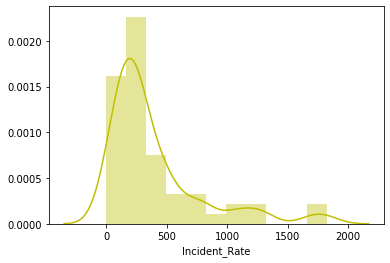

In [14]:
sns.distplot(df['Incident_Rate'],color='y')

 - We can see that the column is positively skewed so replacing the null values with mean will not be a good choice.
 - I am replacing the null values with the median

In [15]:
df['Incident_Rate'] = df["Incident_Rate"].replace(np.nan,df['Incident_Rate'].median())

 - People_Tested

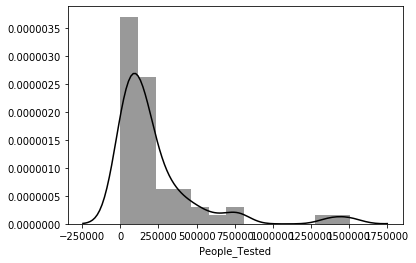

In [16]:
sns.distplot(df['People_Tested'],color='black')

In [17]:
df['People_Tested'] = df['People_Tested'].replace(np.nan,df['People_Tested'].median())

 - Mortality_Rate
 - In Mortality_Rate column we only have one row with null value and thats American Samoa, Which is having 0 deaths and 0 Confirmed cases, so its obvious that the Mortality of this state will be 0.

In [18]:
df['Mortality_Rate'] = df['Mortality_Rate'].replace(np.nan,0)

 - Testing_Rate

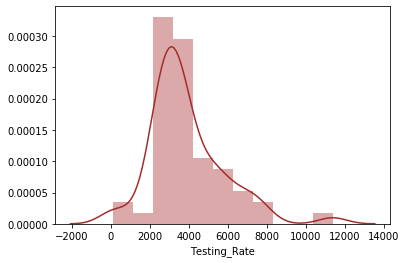

In [19]:
sns.distplot(df['Testing_Rate'],color='brown')

In [20]:
df['Testing_Rate'] = df['Testing_Rate'].replace(np.nan,df['Testing_Rate'].mean())

In [21]:
df.isnull().sum().any()

False

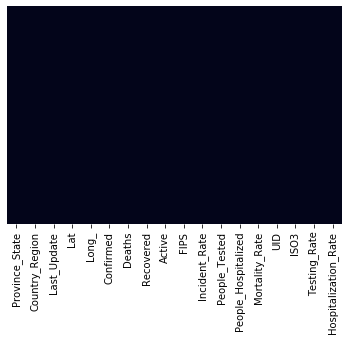

In [22]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

 - So now we dont have any null values in our dataset

# Exploratory Data Analysis:

Text(0.5, 1.0, 'State Wise Confirmed Cases')

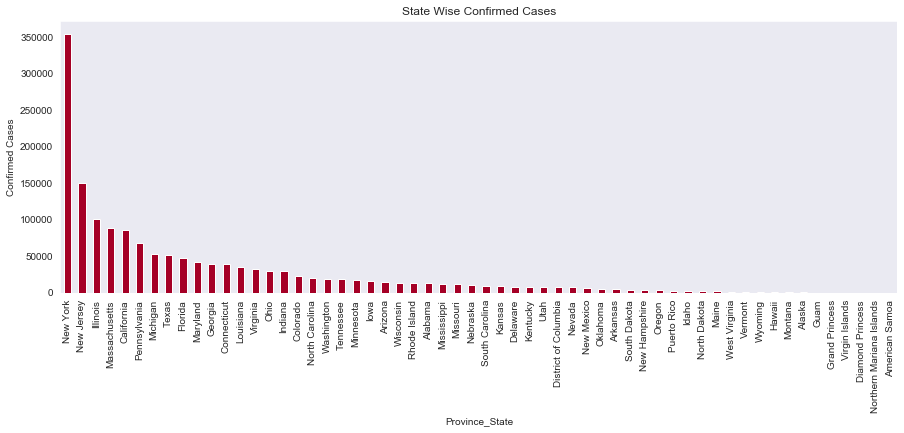

In [23]:
sns.set_style("dark")
plt.figure(figsize=(15,5))
df.groupby('Province_State')['Confirmed'].sum().sort_values(ascending=False).plot(kind='bar',cmap='RdYlBu')
plt.xlabel("Province_State")
plt.ylabel("Confirmed Cases")
plt.title("State Wise Confirmed Cases")

- TOP 5 PROVINCE_STATE WITH MAXIMUM CONFIRMED CASES ARE:
  - New York
  - New Jersy
  - Illinois
  - Massachusetts
  - California

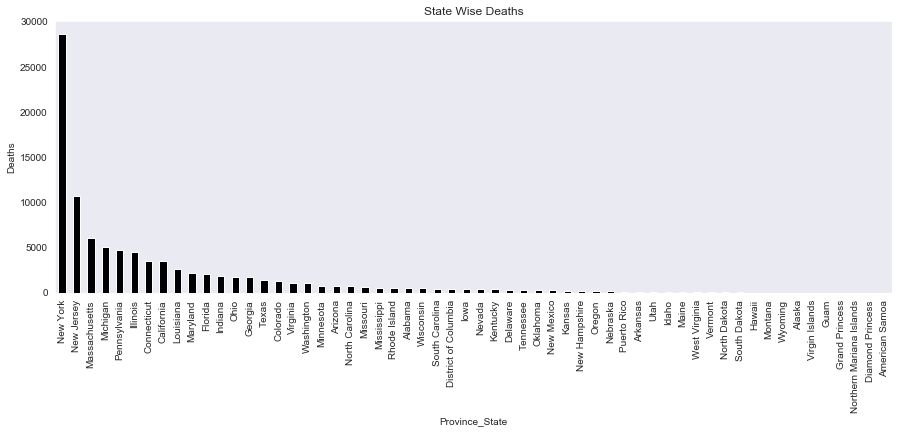

In [24]:
sns.set_style("dark")
plt.figure(figsize=(15,5))
df.groupby('Province_State')['Deaths'].sum().sort_values(ascending=False).plot(kind='bar',cmap='magma')
plt.xlabel("Province_State")
plt.ylabel("Deaths")
plt.title("State Wise Deaths")
print()

- TOP 5 PROVINCE_STATE WITH MAXIMUM DEATH CASES ARE:
  - New York
  - New Jersy
  - Massachusetts
  - Michigan
  - Pennsylvania

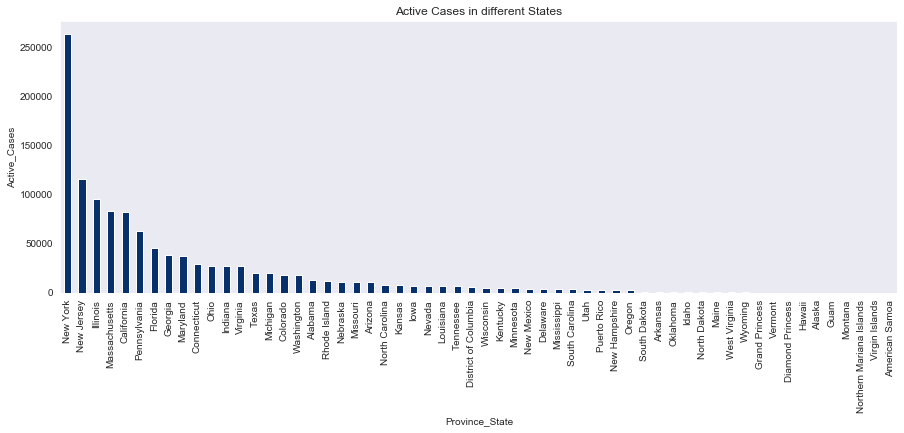

In [25]:
sns.set_style("dark")
plt.figure(figsize=(15,5))
df.groupby('Province_State')['Active'].sum().sort_values(ascending=False).plot(kind='bar',cmap='Blues_r')
plt.xlabel("Province_State")
plt.ylabel("Active_Cases")
plt.title("Active Cases in different States")
print()

- TOP 5 PROVINCE_STATE WITH MAXIMUM ACTIVE CASES ARE:
  - New York
  - New Jersy
  - Illinois
  - Massachusetts
  - California

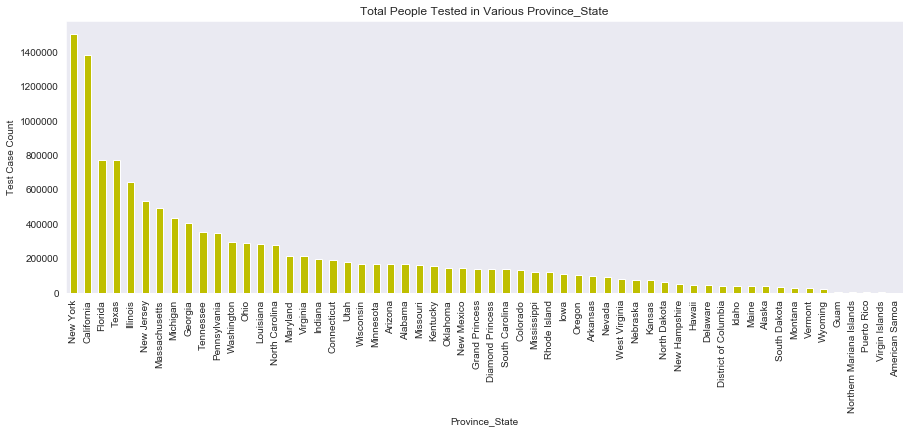

In [26]:
sns.set_style("dark")
plt.figure(figsize=(15,5))
df.groupby('Province_State')['People_Tested'].sum().sort_values(ascending=False).plot(kind='bar',color='y')
plt.xlabel("Province_State")
plt.ylabel("Test Case Count")
plt.title("Total People Tested in Various Province_State")
print()

- TOP 5 PROVINCE_STATE WITH MAXIMUM PEOPLE TESTED ARE:
  - New York
  - California
  - Florida
  - Texas
  - Illinois

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Lat,58.0,3.684009e+01,1.069433e+01,-14.271000,3.487280e+01,3.897860e+01,4.221408e+01,6.137070e+01
Long_,58.0,-8.520661e+01,4.887377e+01,-170.132000,-9.969770e+01,-8.679730e+01,-7.707255e+01,1.456739e+02
Confirmed,58.0,2.675609e+04,5.256203e+04,0.000000,2.596000e+03,1.014850e+04,2.939550e+04,3.543700e+05
Deaths,58.0,1.611017e+03,4.084751e+03,0.000000,7.400000e+01,3.850000e+02,1.394250e+03,2.863600e+04
Recovered,58.0,5.074345e+03,1.039313e+04,0.000000,0.000000e+00,1.079500e+03,4.383750e+03,6.188600e+04
Active,58.0,2.007072e+04,4.129471e+04,0.000000,8.125000e+02,5.644500e+03,1.929125e+04,2.638480e+05
FIPS,58.0,3.288086e+03,1.740835e+04,1.000000,1.825000e+01,3.250000e+01,4.775000e+01,9.999900e+04
Incident_Rate,58.0,3.912048e+02,3.964635e+02,0.000000,1.549092e+02,2.504773e+02,4.628281e+02,1.821620e+03
People_Tested,58.0,2.228466e+05,2.939333e+05,124.000000,4.745000e+04,1.386545e+05,2.620348e+05,1.505836e+06
People_Hospitalized,58.0,3.430017e+03,1.002489e+04,65.000000,1.454500e+03,1.493000e+03,1.722750e+03,7.641000e+04


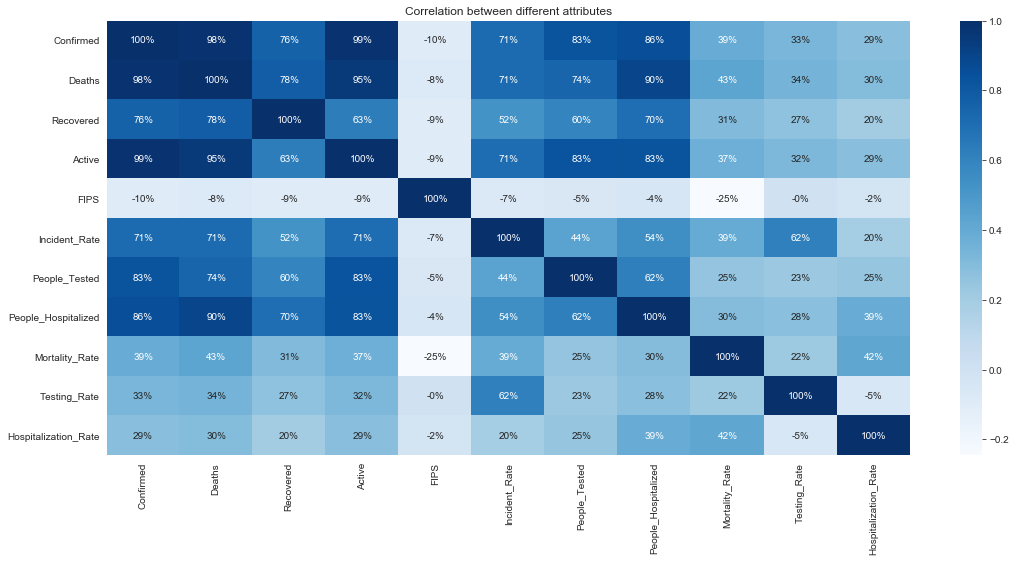

In [28]:
#Correlation between different attributes:
plt.figure(figsize=(18,8))
sns.heatmap(df.drop(['Lat','Long_','Province_State','Country_Region','Last_Update','UID'],axis=1).corr(),annot=True,fmt='.0%',cmap='Blues')
plt.title("Correlation between different attributes")
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

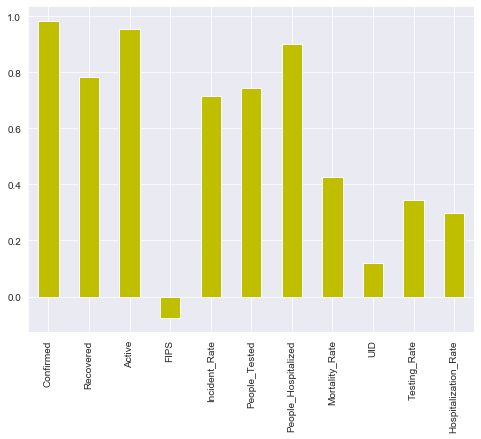

In [29]:
plt.figure(figsize=(8,6))
sns.set_style('dark')
df.drop(['Lat','Long_','Province_State','Country_Region','Last_Update','Deaths'],axis=1).corrwith(df['Deaths']).plot(kind='bar',grid=True,color='y')
plt.xticks(rotation=90)

 - We Can see that columns like ['Confirmed', 'Recovered', 'Active', 'Incident_Rate', 'People_Tested', 'People_Hospitalised', 'Mortality_Rate', 'Testing_Rate', 'Hospitalization_Rate'] are highly correlated with the target variable DEATHS
 - FIPS is the only column having negative correlation with the target variable

# Outlier Detection and Removal:

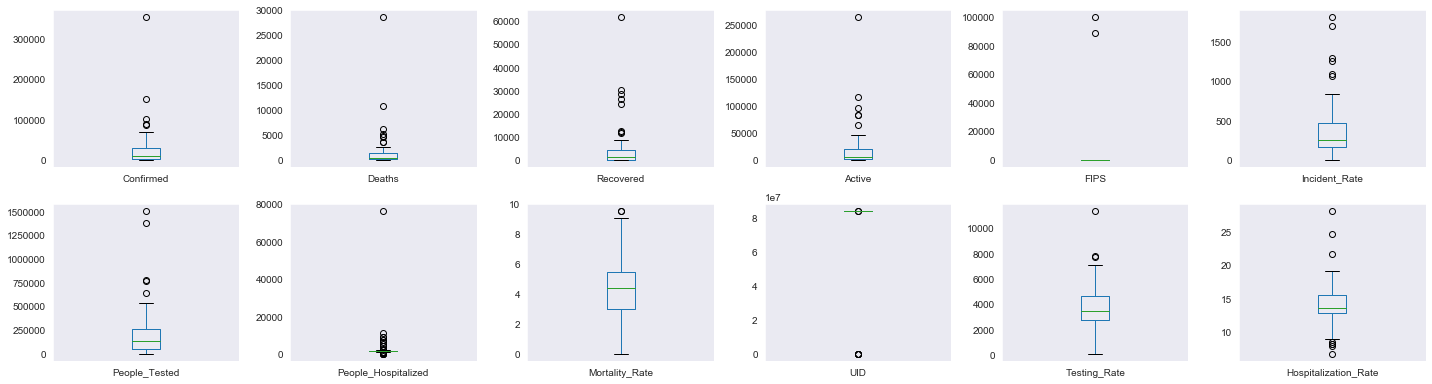

In [30]:
plt.figure(figsize=(20,16))
for i,col in enumerate(list(df.drop(['Lat','Long_','Province_State','Country_Region','Last_Update','ISO3'],axis=1).columns.values)):
                       plt.subplot(6,6,i+1)
                       df.boxplot(col)
                       plt.grid()
                       plt.tight_layout()

In [31]:
qwe = ['Confirmed','Deaths','Recovered','Active','Incident_Rate','Hospitalization_Rate','People_Hospitalized','People_Tested','Mortality_Rate']
for col in qwe:
    col_zscore = col + '_zscore'
    df[col_zscore] = (df[col] - df[col].mean())/df[col].std(ddof=0)

In [32]:
df_no_outliers = df[(df.Confirmed_zscore>-3) & (df.Confirmed_zscore<3)
                     & (df.Deaths_zscore>-3) & (df.Deaths_zscore<3)
                     & (df.Recovered_zscore>-3) &( df.Recovered_zscore<3)
                     & (df.Active_zscore>-3) & (df.Active_zscore<3)
                     & (df.Incident_Rate_zscore>-3) & (df.Incident_Rate_zscore<3)
                     & (df.Hospitalization_Rate_zscore>-3) & (df.Hospitalization_Rate_zscore<3)
                     & (df.People_Hospitalized_zscore>-3) & (df.People_Hospitalized_zscore<3)
                     & (df.People_Tested_zscore>-3) & (df.People_Tested_zscore<3)
                     & (df.Mortality_Rate_zscore>-3) & (df.Mortality_Rate_zscore<3)]
df_no_outliers.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,...,Hospitalization_Rate,Confirmed_zscore,Deaths_zscore,Recovered_zscore,Active_zscore,Incident_Rate_zscore,Hospitalization_Rate_zscore,People_Hospitalized_zscore,People_Tested_zscore,Mortality_Rate_zscore
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,0.0,12530.0,1,...,11.438860,-0.262999,-0.268934,-0.492505,-0.184202,-0.318068,-0.685630,-0.194908,-0.200408,-0.175496
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,...,13.598326,-0.505788,-0.395373,-0.458340,-0.489329,-0.855885,-0.112400,-0.194908,-0.637642,-0.867209
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,0.0,0.0,60,...,13.598326,-0.513484,-0.397843,-0.492505,-0.490281,-0.995354,-0.112400,-0.194908,-0.764350,-2.012895
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,...,12.022005,-0.227419,-0.213370,-0.126306,-0.236575,-0.474304,-0.530835,-0.164822,-0.197028,0.289445
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,...,10.693584,-0.417470,-0.371419,-0.118638,-0.464779,-0.573548,-0.883464,-0.291305,-0.434432,-1.030326


In [33]:
df_no_outliers.drop(['Confirmed_zscore','Deaths_zscore','Recovered_zscore','Active_zscore',
                     'Incident_Rate_zscore','Hospitalization_Rate_zscore','People_Hospitalized_zscore',
                     'People_Tested_zscore','Mortality_Rate_zscore'],axis=1,inplace=True)
df_no_outliers.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,0.0,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,1493.0,2.493766,84000002,USA,5063.940017,13.598326
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,0.0,0.0,60,0.000000,124.0,1493.0,0.000000,16,ASM,222.857246,13.598326
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [34]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

variable = ['Province_State','Country_Region','ISO3']
for i in variable:
    df_no_outliers[i] = lb.fit_transform(df_no_outliers[i])

In [35]:
print(df_no_outliers.corr()["Deaths"].sort_values(ascending=False))

Deaths                  1.000000
Confirmed               0.934362
Active                  0.866273
People_Tested           0.702915
Incident_Rate           0.557785
People_Hospitalized     0.517686
Mortality_Rate          0.502013
Recovered               0.281039
UID                     0.197469
Testing_Rate            0.162687
ISO3                    0.141495
Lat                     0.130752
Hospitalization_Rate    0.099928
Long_                  -0.001759
Province_State         -0.068890
FIPS                   -0.125032
Country_Region               NaN
Name: Deaths, dtype: float64


In [36]:
# Dropping those columns having less correlation with the column Deaths.
X = df_no_outliers.drop(['Last_Update','FIPS','ISO3','Deaths','Lat',
                         'Long_','UID','Country_Region','Hospitalization_Rate','Testing_Rate'],axis=1)

In [37]:
y = df_no_outliers['Deaths']

In [38]:
X.head()

,Province_State,Confirmed,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate
0,0,13052,0.0,12530.0,266.194321,164450.0,1493.0,3.999387
1,1,401,352.0,39.0,54.815493,37045.0,1493.0,2.493766
2,2,0,0.0,0.0,0.000000,124.0,1493.0,0.000000
3,3,14906,3773.0,10386.0,204.788838,165435.0,1792.0,5.011405
4,4,5003,3852.0,1044.0,165.782801,96258.0,535.0,2.138717


# Model:

 - Random Forest Regressor

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
rgr = RandomForestRegressor(n_estimators=200)
rgr.fit(X_train, y_train)
pred_rgr = rgr.predict(X_test)

Text(0, 0.5, 'Predicted Y')

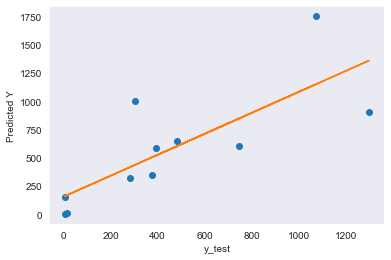

In [40]:
m, b = np.polyfit(y_test, pred_rgr, 1)
plt.plot(y_test,pred_rgr,'o')
plt.plot(y_test, m*y_test + b)
plt.xlabel("y_test")
plt.ylabel("Predicted Y")

In [41]:
#Cross-Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rgr,X_train, y_train, scoring ='r2',cv=3)
scores.mean()

0.8521580508603309

 - We can see that we are getting a good r2_score of around 85%, and our model is not overfitting or underfitting also



 - Decision Tree Regressor

In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,test_size=0.3,random_state=42)
dtr=DecisionTreeRegressor()
dtr.fit(X_train1,y_train1)
pred_dtr=dtr.predict(X_test1)

Text(0, 0.5, 'Predicted Y')

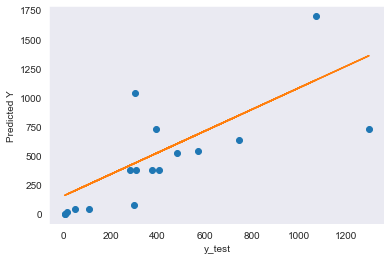

In [43]:
m1, b1 = np.polyfit(y_test1, pred_dtr, 1)
plt.plot(y_test1,pred_dtr,'o')
plt.plot(y_test1, m*y_test1 + b)
plt.xlabel("y_test")
plt.ylabel("Predicted Y")

In [44]:
#Cross-Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dtr,X_train1, y_train1, scoring ='r2',cv=5)
scores.mean()

0.7615021984367558

 - We are getting a score of 76%, which is not bad but RandomForestRegressor was giving better result 



 - KNeighbors Regresor

In [45]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
X_train2,X_test2,y_train2,y_test2=train_test_split(X,y,test_size=0.3,random_state=42)
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train2,y_train2)
pred_knn=knn.predict(X_test2)

Text(0, 0.5, 'Predicted Y')

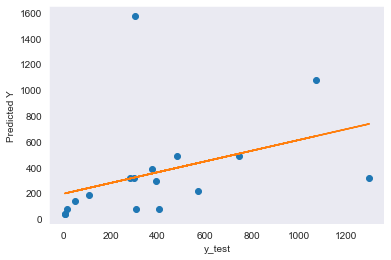

In [46]:
m, b = np.polyfit(y_test2, pred_knn, 1)
plt.plot(y_test2,pred_knn,'o')
plt.plot(y_test2, m*y_test2 + b)
plt.xlabel("y_test")
plt.ylabel("Predicted Y")

In [47]:
#Cross-Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn,X_train2, y_train2, scoring ='r2',cv=5)
scores.mean()

0.6659139688336653

 - So Out of all the three models our model is best performing for Random Forest Regressor
 - Lets save our model for Random Forest Regressor

In [48]:
# lets save our model using joblib
from sklearn.externals import joblib
joblib.dump(rgr,'US_COVID_ANALYSIS.pkl')

['US_COVID_ANALYSIS.pkl']